In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn

## Load data and split into train & test

In [2]:
df = pd.read_csv("./data/Dry_Bean_Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
X = df.drop('Class', axis=1)
y = df.Class.values

### Encode target

In [4]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Scale data

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#fit transformation to test set
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train_scaled

array([[-0.82004684, -0.41496395, -0.9916898 , ...,  0.87409641,
         0.26508427,  0.34316281],
       [-0.50936012, -0.04773017, -0.56941112, ...,  0.32551494,
         0.16383972,  0.04702778],
       [-0.7548078 , -0.36807121, -1.04911073, ...,  1.38029879,
         1.01678554,  0.34322861],
       ...,
       [ 1.27973353,  1.19277046,  1.60855361, ..., -1.3015929 ,
        -0.95796902, -0.24362728],
       [-0.49781492, -0.1830065 , -0.85527186, ...,  1.41306453,
         1.61953833,  0.85939177],
       [ 0.37072934, -2.3784256 ,  0.9513581 , ..., -1.22706772,
        -1.41055324, -1.00995094]])

In [8]:
n_features = X_train_scaled.shape[1]
output_features = len(df['Class'].unique())

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(output_features, activation='softmax'))

2021-11-03 12:05:13.896064: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, verbose=0)

2021-11-03 12:05:14.040897: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [11]:
# evaluate the model
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.925


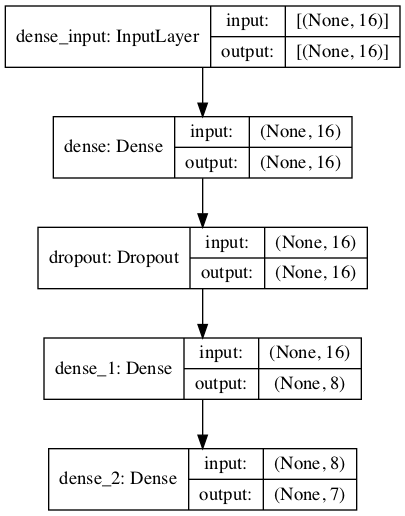

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

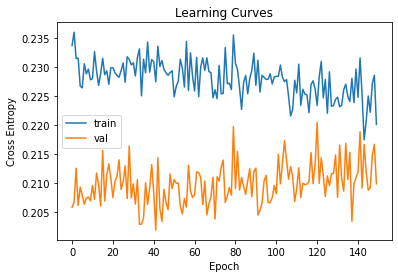

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=150, batch_size=32, verbose=0)

plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

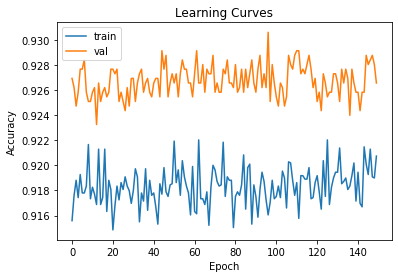

In [14]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()